In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
df=pd.read_csv('G:/INTELIPAAT/case study, project/customer churn keras/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.shape

(7043, 21)

### Need to convert TotalCharges column from sting to numeric

In [8]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

### Cheking for null values and filling with mean

In [9]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [11]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
# a. Find the total number of male customers
total_male_customers = df[df['gender'] == 'Male']['gender'].count()
print('Total number of male customers are: ', total_male_customers)

# b. Find the total number of customers whose Internet Service is 'DSL'
total_dsl_customers = df[df['InternetService'] == 'DSL']['InternetService'].count()
print('Total number of customers whose Internet Service is DSL: ', total_dsl_customers)

# c. Extract all the Female senior citizens whose Payment Method is Mailed check
new_customer1 = df[(df['gender'] == 'Female') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Mailed check')]

# d. Extract customers with tenure less than 10 months or total charges less than $500
new_customer2 = df[(df['tenure'] < 10) | (df['TotalCharges'] < 500)]


Total number of male customers are:  3555
Total number of customers whose Internet Service is DSL:  2421


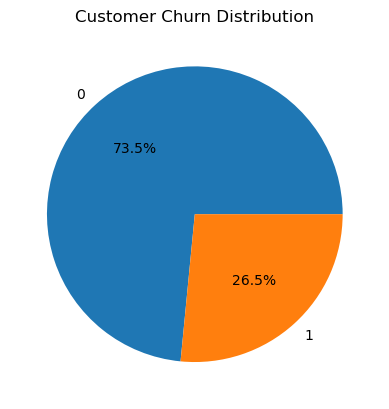

In [27]:
import matplotlib.pyplot as plt

# a. Build a pie-chart to show the distribution of customers who would be churning out
churn_distribution = df['Churn'].value_counts()
plt.pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%')
plt.title("Customer Churn Distribution")
plt.show()



### From pie chart we can see distribution of people who would be churn out is less.

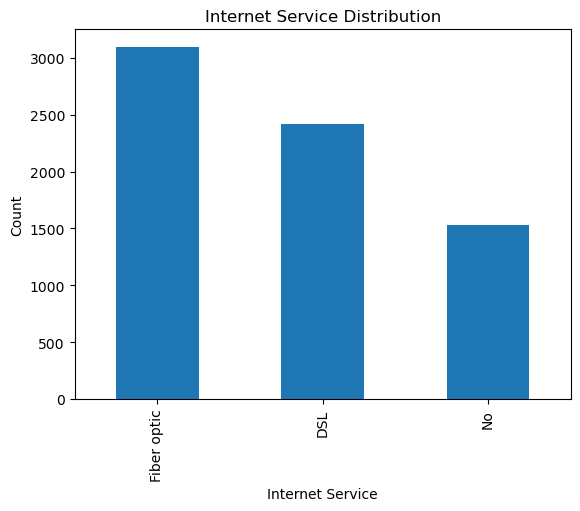

In [28]:
# b. Build a bar-plot to show the distribution of 'Internet Service'
internet_service_distribution = df['InternetService'].value_counts()
internet_service_distribution.plot(kind='bar')
plt.title("Internet Service Distribution")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.show()


### From Bar plot we can see Fiber optic Internet Service users are more.

In [14]:
# Lable encoding target variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])
y=df['Churn']

In [15]:
# Split the dataset into features and target variable
X = df[['tenure']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# a. Build the first model
model1 = Sequential()
model1.add(Dense(12, input_dim=1, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


In [16]:
history1=model1.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
177/177 [==============================] - 2s 5ms/step - loss: 0.5241 - accuracy: 0.7384 - val_loss: 0.4973 - val_accuracy: 0.7353
Epoch 2/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7348 - val_loss: 0.4973 - val_accuracy: 0.7353
Epoch 3/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5146 - accuracy: 0.7426 - val_loss: 0.4982 - val_accuracy: 0.7353
Epoch 4/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5143 - accuracy: 0.7417 - val_loss: 0.4975 - val_accuracy: 0.7353
Epoch 5/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5148 - accuracy: 0.7345 - val_loss: 0.4976 - val_accuracy: 0.7353
Epoch 6/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5143 - accuracy: 0.7412 - val_loss: 0.4990 - val_accuracy: 0.7573
Epoch 7/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5140 - accuracy: 0.7483 - val_loss: 0.4974 - val_accuracy: 0.7353

In [17]:
y_pred1 = (model1.predict(X_test) > 0.5)
cm1 = confusion_matrix(y_test, y_pred1)
cm1

45/45 [==============================] - 0s 2ms/step


array([[930, 106],
       [239, 134]], dtype=int64)

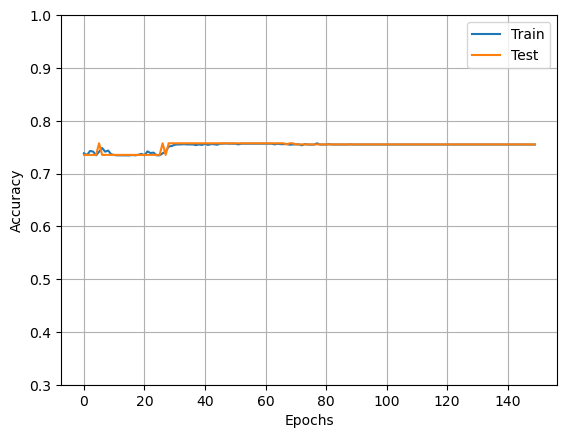

In [18]:
train_acc = history1.history["accuracy"]
val_acc = history1.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.3,1)
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

### From above model we can conclude that training is nearly stopped at some point and model is not learning further.

In [19]:
# b. Build the second model with dropout layers
model2 = Sequential()
model2.add(Dense(12, input_dim=1, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(8, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [20]:
history2=model2.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test))


Epoch 1/150
177/177 [==============================] - 2s 4ms/step - loss: 1.0684 - accuracy: 0.6379 - val_loss: 0.5018 - val_accuracy: 0.7353
Epoch 2/150
177/177 [==============================] - 0s 3ms/step - loss: 0.6218 - accuracy: 0.7114 - val_loss: 0.5003 - val_accuracy: 0.7353
Epoch 3/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7247 - val_loss: 0.5002 - val_accuracy: 0.7353
Epoch 4/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5738 - accuracy: 0.7290 - val_loss: 0.5043 - val_accuracy: 0.7353
Epoch 5/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5572 - accuracy: 0.7283 - val_loss: 0.5043 - val_accuracy: 0.7353
Epoch 6/150
177/177 [==============================] - 1s 3ms/step - loss: 0.5449 - accuracy: 0.7304 - val_loss: 0.5026 - val_accuracy: 0.7353
Epoch 7/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5478 - accuracy: 0.7322 - val_loss: 0.5048 - val_accuracy: 0.7353

In [21]:
y_pred2 = (model2.predict(X_test) > 0.5)
cm2 = confusion_matrix(y_test, y_pred2)
cm2

45/45 [==============================] - 0s 2ms/step


array([[1036,    0],
       [ 373,    0]], dtype=int64)

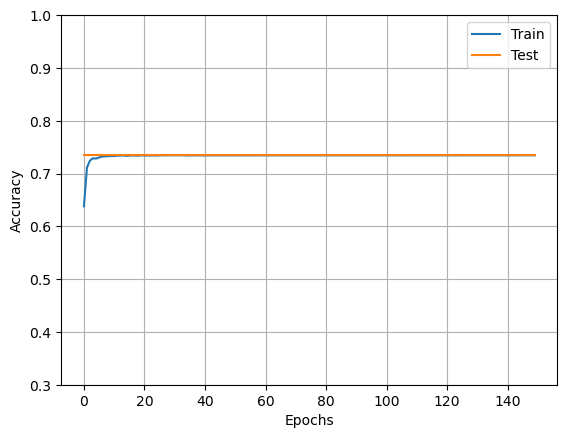

In [22]:
train_acc = history2.history["accuracy"]
val_acc = history2.history["val_accuracy"]
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.3,1)
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

### Using drop out layer model is slightly better but not at the best level. From accuracy matrics we can see that model is not working properly.

In [23]:
# c. Build the third model with multiple features
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train.shape)
print(X_test.shape)
print(y_test)


model3 = Sequential()
model3.add(Input(3))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])


(5634, 3)
(1409, 3)
185     1
2715    0
3825    0
1807    1
132     0
       ..
6366    0
315     0
2439    0
5002    0
1161    1
Name: Churn, Length: 1409, dtype: int32


In [24]:
history3=model3.fit(x=X_train, y=y_train, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
177/177 [==============================] - 2s 4ms/step - loss: 0.7201 - accuracy: 0.4324 - val_loss: 0.7075 - val_accuracy: 0.4535
Epoch 2/150
177/177 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.4840 - val_loss: 0.6803 - val_accuracy: 0.5252
Epoch 3/150
177/177 [==============================] - 0s 3ms/step - loss: 0.6681 - accuracy: 0.5618 - val_loss: 0.6591 - val_accuracy: 0.5798
Epoch 4/150
177/177 [==============================] - 0s 3ms/step - loss: 0.6496 - accuracy: 0.6329 - val_loss: 0.6386 - val_accuracy: 0.6423
Epoch 5/150
177/177 [==============================] - 0s 3ms/step - loss: 0.6276 - accuracy: 0.6709 - val_loss: 0.6112 - val_accuracy: 0.6764
Epoch 6/150
177/177 [==============================] - 0s 2ms/step - loss: 0.6042 - accuracy: 0.7242 - val_loss: 0.5869 - val_accuracy: 0.7495
Epoch 7/150
177/177 [==============================] - 0s 3ms/step - loss: 0.5844 - accuracy: 0.7634 - val_loss: 0.5660 - val_accuracy: 0.7835

In [25]:
y_pred3 = (model3.predict(X_test) > 0.5)
cm3 = confusion_matrix(y_test, y_pred3)
cm3

45/45 [==============================] - 0s 2ms/step


array([[949,  87],
       [202, 171]], dtype=int64)

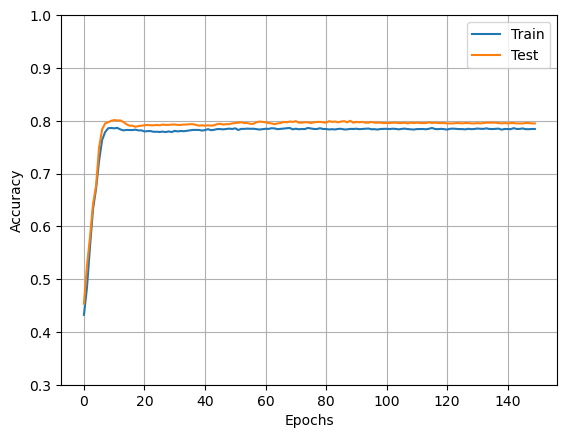

In [26]:
train_acc = history3.history["accuracy"]
val_acc = history3.history["val_accuracy"]

plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim(0.3,1)
plt.legend(["Train", "Test"])
plt.grid()
plt.show()

## After adding two more features to the model, accuracy is increased to nearly 80%. So, we can see that choosing appropiate features to model gives us better accuracy. 